Iniciando cálculo de Anomalía de Presión (SLP) en: D:\Descargas\mslp.mon.mean.nc
Calculando la anomalía de SLP. ESPERE...
Cálculo finalizado. Generando figura.


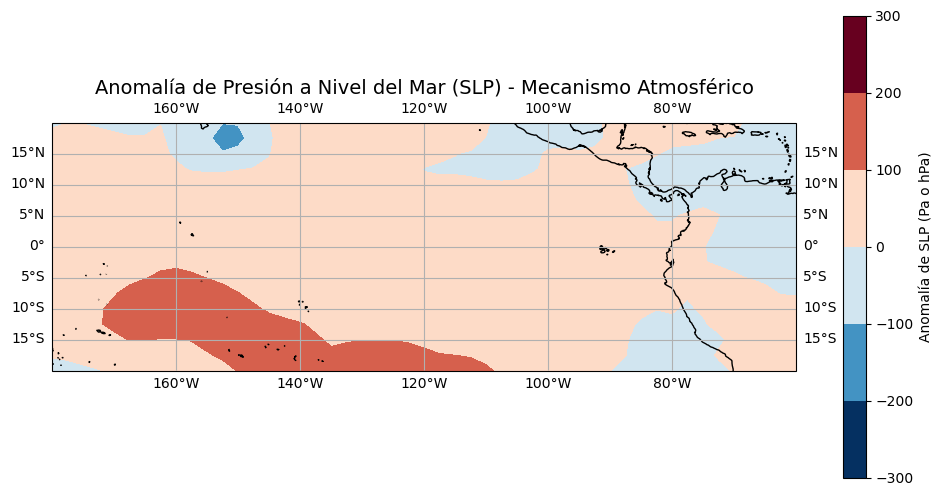


🎉 ¡ÉXITO! Ya tienes el mapa del Mecanismo Atmosférico.


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np 
import warnings
# Intenta importar cartopy. Si falla, el código lo ignorará.
try:
    import cartopy.crs as ccrs 
    CARTOPY_INSTALLED = True
except ImportError:
    CARTOPY_INSTALLED = False

warnings.filterwarnings("ignore", category=SyntaxWarning)

# --------------------------------------------------------------------------------
# --- RUTA DEL ARCHIVO NCEP SLP EN TU DISCO DURO LOCAL ---
# ⚠️ RUTA AJUSTADA: D:\Descargas\mslp.mon.mean.nc
ruta_ncep_slp = r'D:\Descargas\mslp.mon.mean.nc' 
# El prefijo 'r' maneja las barras invertidas de Windows.
# --------------------------------------------------------------------------------

print(f"Iniciando cálculo de Anomalía de Presión (SLP) en: {ruta_ncep_slp}")

try:
    # 1. Carga de datos SLP (NCEP)
    ds_slp = xr.open_dataset(ruta_ncep_slp, chunks={'time': 50}) 

    # Asumimos que la variable se llama 'mslp' (Mean Sea Level Pressure)
    # Si da error, intenta cambiar 'mslp' por 'slp'.
    slp_data = ds_slp['mslp']
    
    # 2. SELECCIÓN DE LA REGIÓN (Pacífico Tropical)
    lon_slice = slice(180, 300)
    lat_slice = slice(20, -20)
    slp_pacifico = slp_data.sel(lon=lon_slice, lat=lat_slice) 
    
    # 3. CÁLCULO DE CLIMATOLOGÍA (1981-2010)
    base_slp = slp_pacifico.sel(time=slice('1981-09', '2010-12')) 
    clim_slp = base_slp.groupby('time.month').mean('time') 

    # 4. CÁLCULO DE LA ANOMALÍA
    anom_slp = slp_pacifico.groupby('time.month') - clim_slp
    anom_slp_evento = anom_slp.sel(time=slice('2022-09', '2023-03')).mean('time')

    # Forzar la carga de los datos finales
    print("Calculando la anomalía de SLP. ESPERE...")
    anom_slp_plot = anom_slp_evento.load() 
    print("Cálculo finalizado. Generando figura.")

    # 5. VISUALIZACIÓN DE LA ANOMALÍA DE SLP
    plt.figure(figsize=(12, 6))
    
    if CARTOPY_INSTALLED:
        # Usa Cartopy para un mapa profesional
        ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=240))
        ax.coastlines()
        ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

        # Plotea el resultado. Usamos hPa o Pa (la unidad de NCEP)
        anom_slp_plot.plot.contourf(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap="RdBu_r",           
            center=0,                
            # Rango de anomalía típico, ajusta si es necesario
            vmin=-300, 
            vmax=300,                  
            cbar_kwargs={"label": "Anomalía de SLP (Pa o hPa)"}
        )
    else:
        # Ploteo simple
        print("Advertencia: Cartopy no encontrado. Usando ploteo simple.")
        anom_slp_plot.plot(
            cmap="RdBu_r",           
            center=0,                
            vmin=-300,                 
            vmax=300,                  
            cbar_kwargs={"label": "Anomalía de SLP (Pa o hPa)"}
        )
    
    plt.title("Anomalía de Presión a Nivel del Mar (SLP) - Mecanismo Atmosférico", fontsize=14)
    plt.show()
    print("\n🎉 ¡ÉXITO! Ya tienes el mapa del Mecanismo Atmosférico.")

except FileNotFoundError:
    print(f"\n🛑 ERROR DE ARCHIVO: No se encontró el archivo en la ruta: {ruta_ncep_slp}. Verifica la ruta o el nombre del archivo.")
except KeyError:
    print("\n🛑 ERROR DE VARIABLE: El archivo se cargó, pero no se encontró la variable 'mslp'. Intenta cambiar 'mslp' por 'slp' en el código.")
except Exception as e:
    print(f"\n🛑 FALLO INESPERADO: El error fue: {e}")